In [1]:
library(ggplot2)
fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }
 fig(10, 5)

### Exercise 1
    The triangular distribution, in the interval (a, b), is given by the following:
    f (X) = 2(x − a)/((b − a)(c − a))   for a ≤ x < c
            2(b − x)/((b − a)(b − c))   for c ≤ x ≤ b
            0                           otherwise
    where c ∈ [a, b].
    
    a) plot the function, given the interval (a, b)
    b) and write an algorithm to generate random numbers from the triangular distribution
    c) generate 104 random number from the distribution, show them in an histogram and
    superimpose the analytical curve

In [2]:
f <- function(x, a, b, c) {
    ifelse((x < c),
       ifelse((x >= a), 2*(x-a)/((b-a)*(c-a)), 0),
       ifelse((x <= b), 2*(b-x)/((b-a)*(b-c)), 0))
  }

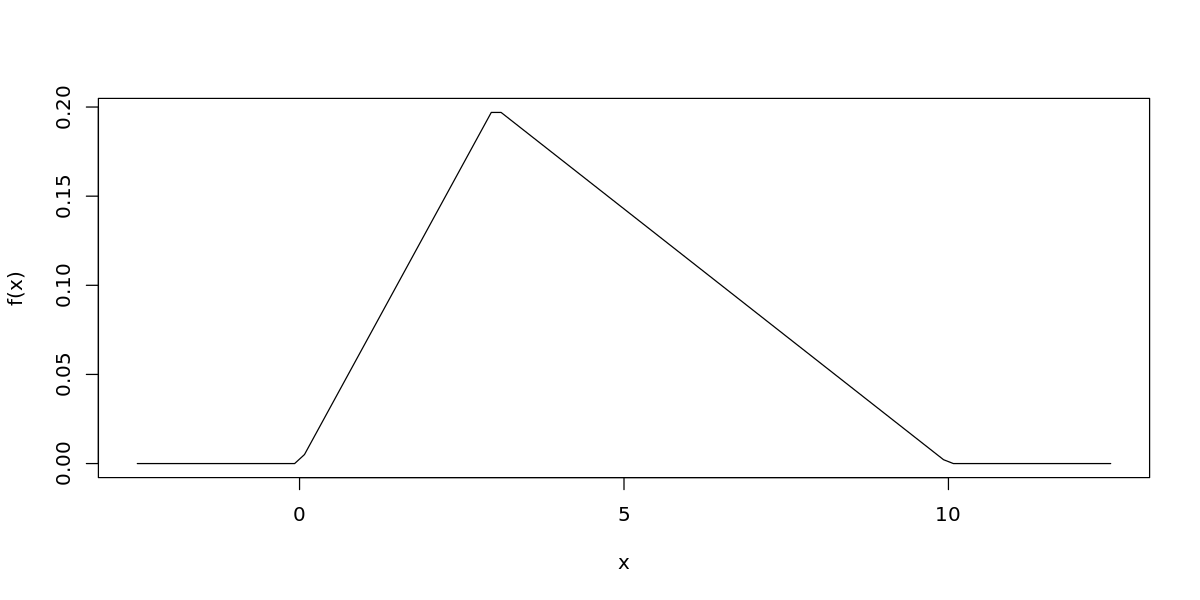

In [3]:
a <- 0
b <- 10
c <- 3
margin <- (b - a)/4

xs = seq(a - margin, b + margin, length=100)

plot(xs, f(xs, a, b, c), pch=0, col = 1, xlab='x', ylab='f(x)', type = 'l')

In [4]:
invCDF <- function(p, a,b,c) {
    value <- ifelse(0 <= p & p < (c-a)/(b-a), a + sqrt(p * (b-a) * (c-a)), 
             ifelse((c-a)/(b-a) <= p & p <= 1, b - sqrt((1-p) * (b-a) * (b-c)), -1))
    return(value)
}

In [5]:
rtriangular <- function(a,b,c, num=1) {
    u <- runif(num)
    triang <- invCDF(u, a,b,c)
    return(triang)
}

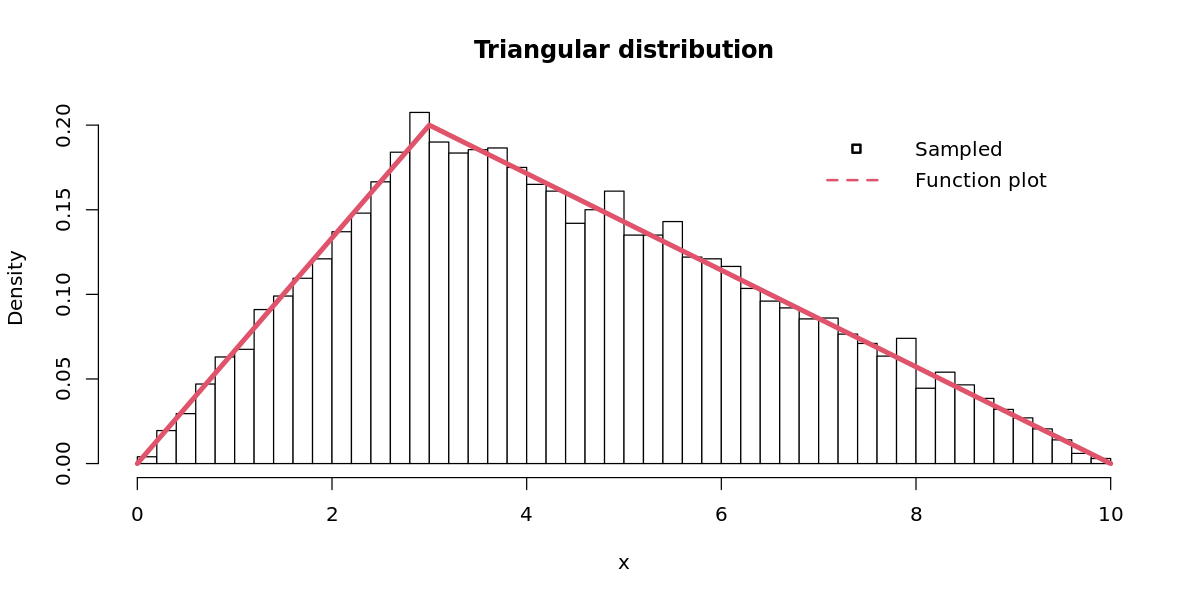

In [6]:
N = 10000
hist(rtriangular(a, b, c, N), 50, freq = FALSE, xlab = "x", main = "Triangular distribution", col = 0)
curve(f(x, a, b, c), from = a, to = b, lwd = 4, col = 2, lty = 1, add=TRUE)

legend(7, 0.2, c("Sampled","Function plot"), pch = c(22,NA), lty = c(NA,2), 
       col = c(1,2),  lwd = c(2,2), bty = "n", y.intersp = 2)


### Exercise 2 - Markov’s inequality

    Markov’s inequality represents an upper bound to probability distributions: P(X ≥ k) ≤ E[X]/k for k > 0.
    Having defined a function G(k) = 1 − F(k) ≡ P(X ≥ k), plot G(k) and the Markov’s upper bound for:
    a) the exponential, Exp(λ = 1), distribution function
    b) the uniform, U (3, 5), distribution function
    c) the binomial, Bin(n = 1, p = 1/2), distribution function
    d) a Poisson, Pois(λ = 1/2), distribution function

In [7]:
G <- function(E, func, sigma, ...) {
    k <- seq(0, 7, length=100)
    if (sigma == "no") {
            plot(k, (1 - func(q=k, ...)), type = "l", lwd = 2, col=1, ylab = '', main = paste(as.character(substitute(func)), ",  Markov"))
            curve(E/x, from=0, to=7, lwd=2, col = 2, lty=2, add=TRUE)
            legend = c(expression(P(X >= k)), expression(E(X) / k))
    } else {
            plot(k, func(q = E + k * sigma, ...) - func(q = E - k * sigma, ...), type = "l", lwd = 2, col=1, ylab = '', main = paste(as.character(substitute(func)), ",  Chebichev"))
            curve(1 - 1/(x^2), from=0, to=7, lwd=2, col = 2, lty=2, add=TRUE)
            legend = c(expression(P(abs(X - mu) < k * sigma)), expression(1 - 1/(k^2)))
    }
    legend(5, 0.4, legend = legend, col = c(1, 2), lwd = c(2,2), lty = c(1,2),
            cex = 0.8, y.intersp = 2, bty = "n")
}

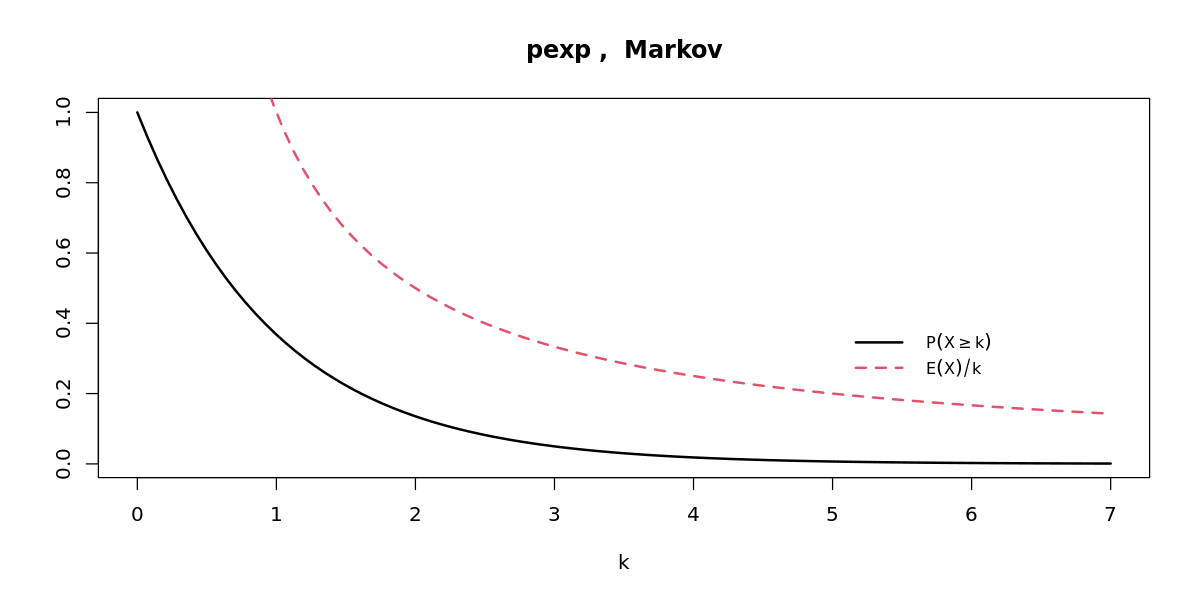

In [8]:
G(E = 1, func = pexp, rate = 1, sigma = "no")


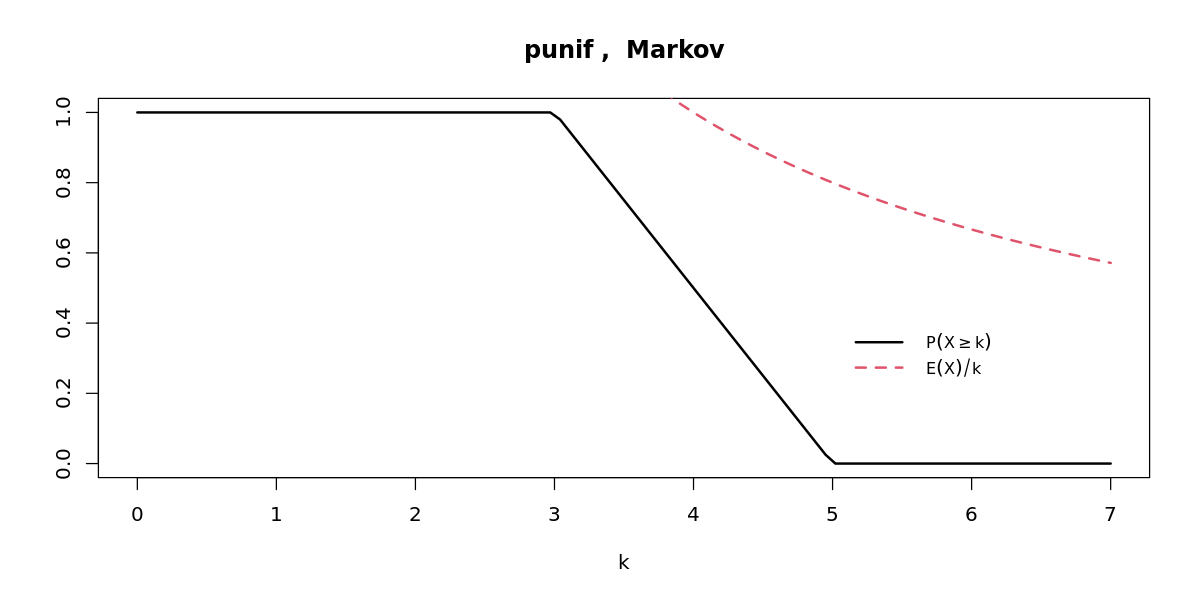

In [9]:
G(E = 4, func = punif, min = 3, max = 5, sigma = "no")


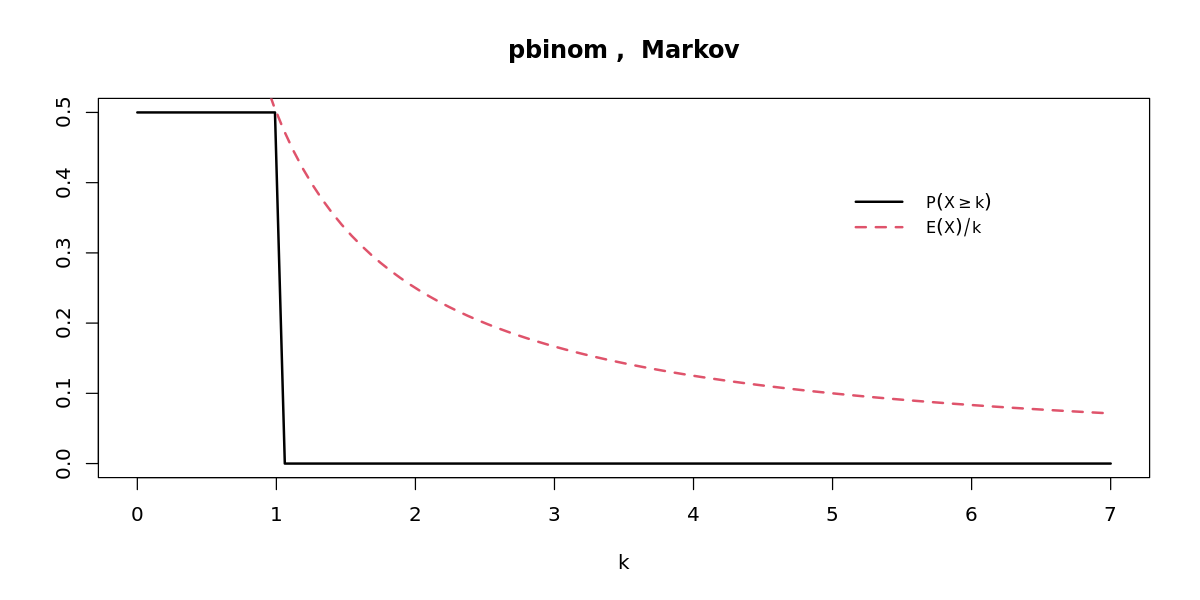

In [10]:
G(E = 0.5, func = pbinom, size = 1, prob = 1/2, sigma = "no")


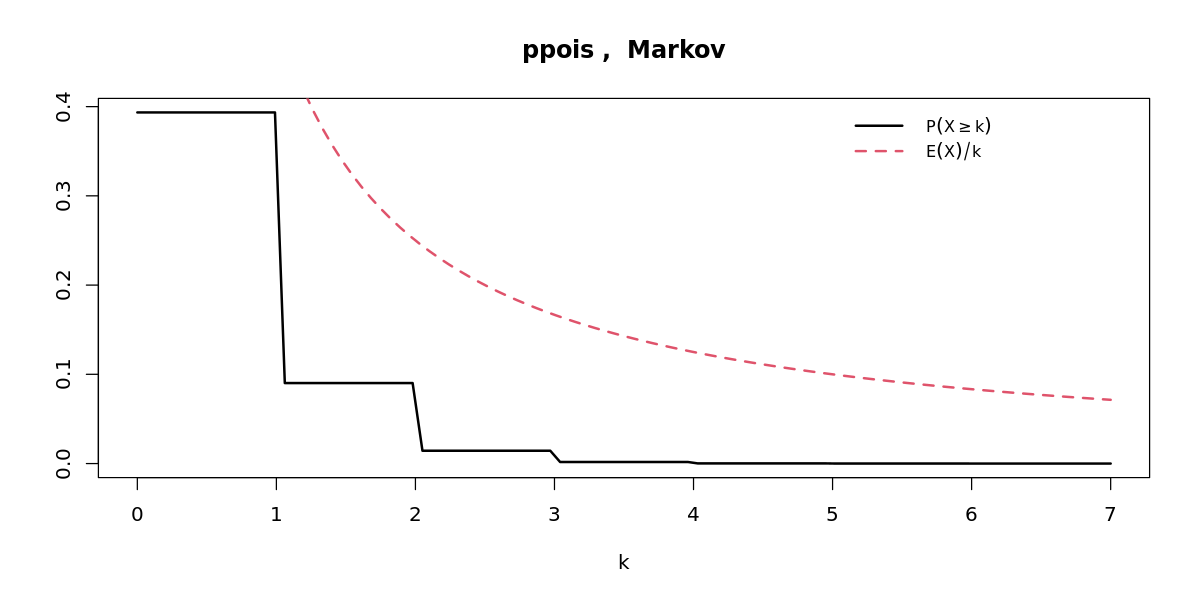

In [11]:
G(E = 0.5, func=ppois, lambda = 0.5, sigma = "no")


### Exercise 3 - Chebyshev’s inequality
    Chebyshev’s inequality tell us that P(∣X − μ∣ ≥ kσ) ≤ 1/k^2
    It can also be written as P(∣X − μ∣ < kσ) ≥ 1−1/k^2.
    Use R to show, with a plot, that Chebyshev’s inequality is is an upper bound to the following distributions:
    a) a normal distribution, N(μ = 3, σ = 5)
    a) an exponential distribution, Exp(λ = 1)
    b) a uniform distribution U (1 − √2, 1 + √2)
    d) a Poisson, Pois(λ = 1/3), distribution function

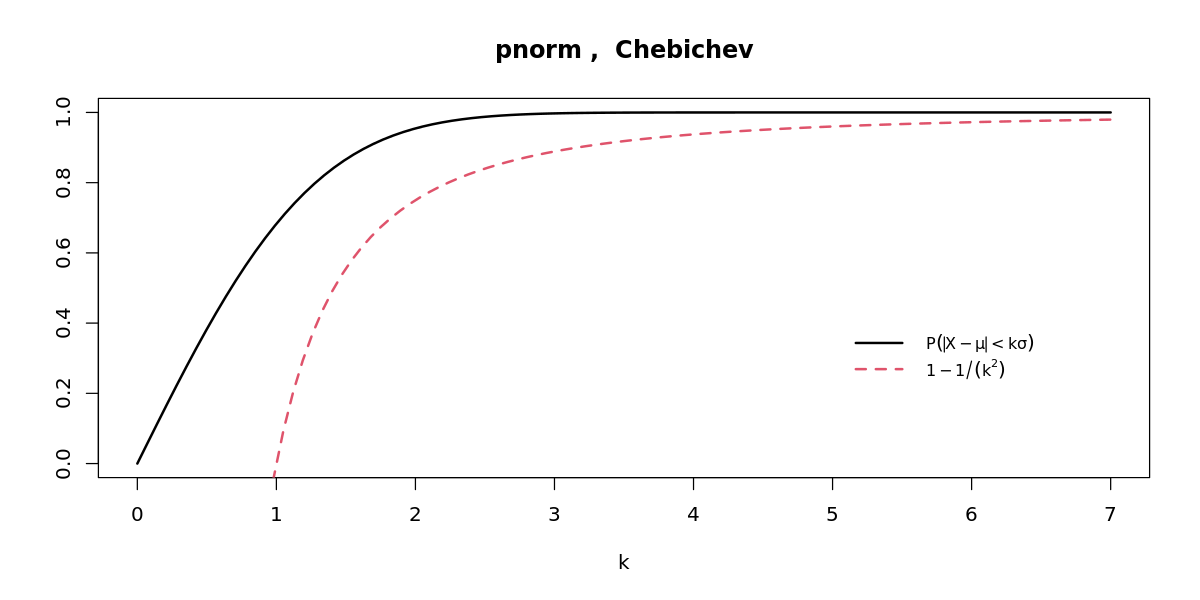

In [12]:
G(func = pnorm, mean = 3, sd = 5, E = 3, sigma = 5)

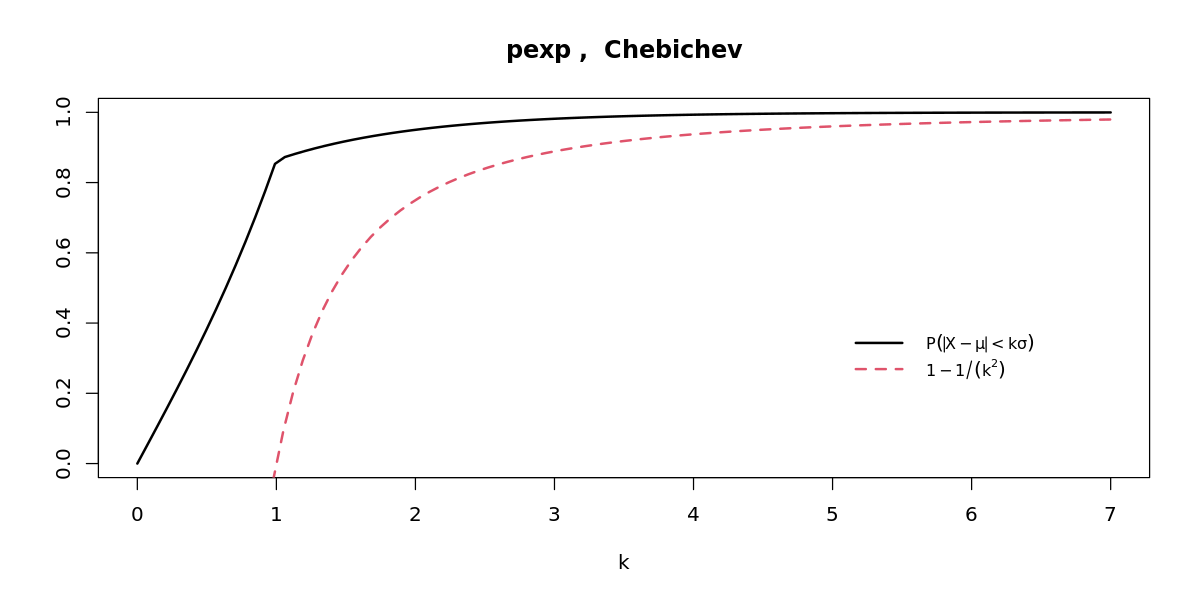

In [13]:
G(func = pexp, rate = 1, E = 1, sigma = 1)

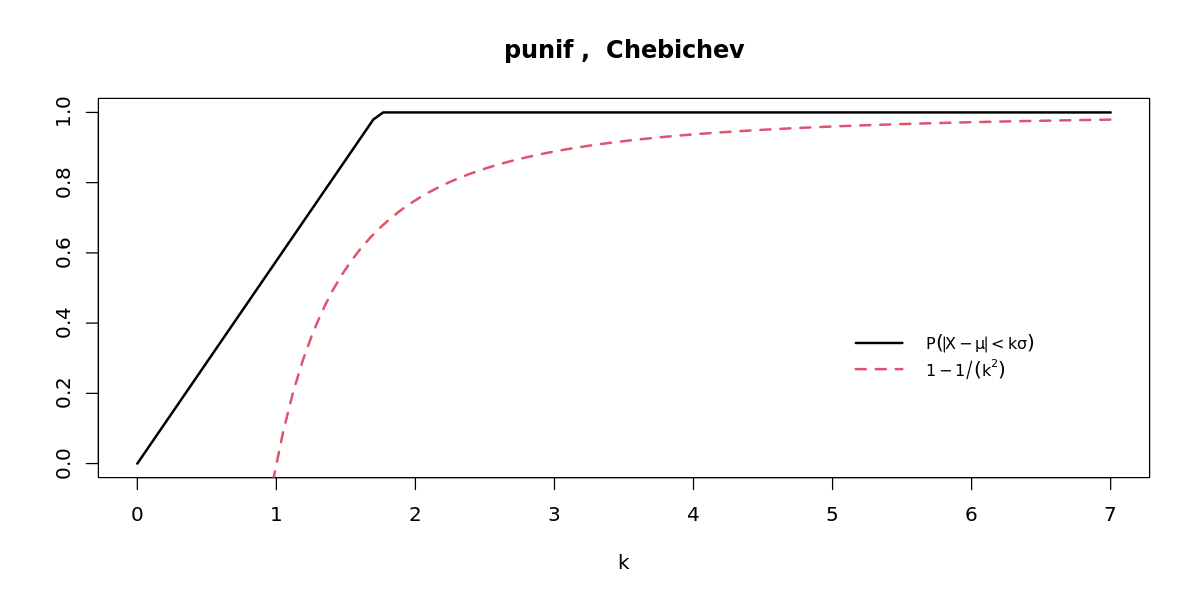

In [14]:
G(func = punif, min = 1 - sqrt(2), max = 1 + sqrt(2), E = 1, sigma = sqrt(2/3))

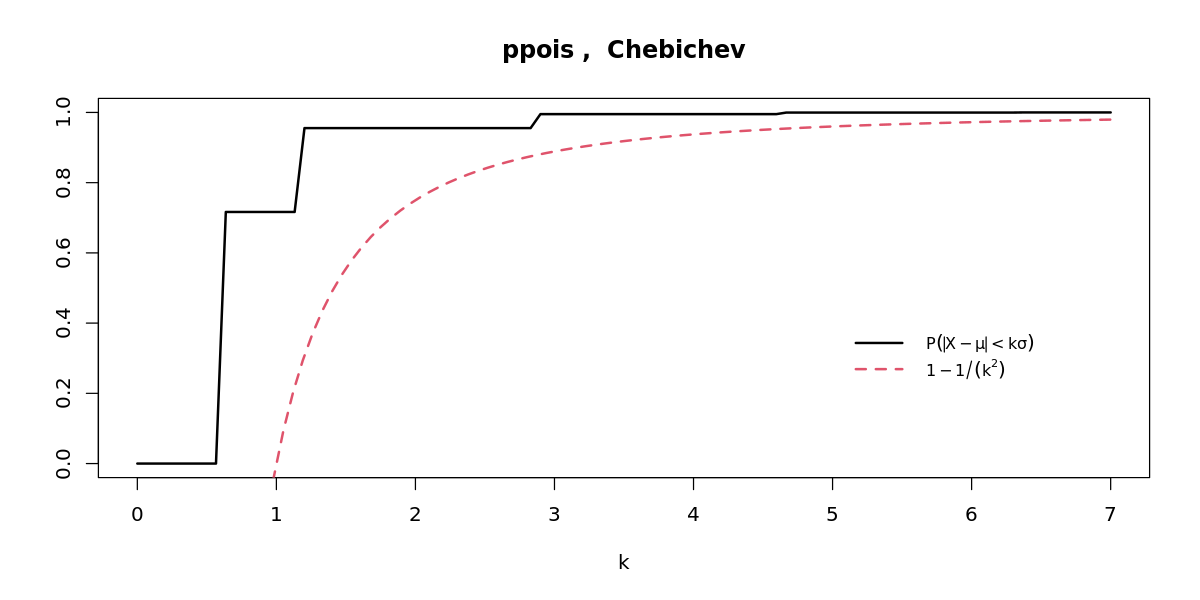

In [15]:
G(func = ppois, lambda = 1/3, E = 1/3, sigma = sqrt(1/3))

### Exercise 4 - Six Boxes Toy Model : inference
    Label the boxes as Hi, where i is the number of white balls out of 5.
    
    Write a program in R that:
    1) allows the user to insert the color of a randomly extracted box and
    3) prints on the standard output the probability of selecting each box
    4) plots the probability for each box as a function of the extraction step

The color of the ball extracted has to be inserted in the prompt.

In [23]:
options(digits = 3)
prob_Hi_lastval <- rep(1/6, 6)
prob_w_given_Hi <- c(0, 1/5, 2/5, 3/5, 4/5, 5/5)
prob_Hi_history <- matrix(NA, nrow=0, ncol=6)
extractions <- c()
color <- "N"

while(!(color == "W" || color == "B")){
    
    color<-as.character(readline(prompt="Type B, W, S to extract White, Black, Stop" ))
    if(color == "S"){
        break
    }
    if(color == "B"){
        n <- 0
        color <- "Black"
    }
    if(color == "W"){
        n <- 1
        color <- "White"
    }

    cat("Extracted color:\t ", color, "\n")
    color <- "N"
    norm <- 0
    extractions <- c(extractions, n)
    cat("extractions:\t ",extractions, "\n")

    for (i in 1:6){
    norm <- norm + prob_Hi_lastval[i]*(prob_w_given_Hi[i] * n + (1-n)*(1-prob_w_given_Hi[i]))
    } 
    for (i in 1:6){
    prob_Hi_lastval[i] <- prob_Hi_lastval[i]*(prob_w_given_Hi[i] * n + (1-n)*(1-prob_w_given_Hi[i]))/ norm 
    }
    cat("Probabilities for each box H_i:\t ")
    for (i in 1:6){
    cat(prob_Hi_lastval[i], "\t")
    }
    message("\n\n")

    prob_Hi_history <- rbind(prob_Hi_history, prob_Hi_lastval)
    n <- 3
}

Extracted color:	  Black 
extractions:	  0 
Probabilities for each box H_i:	 0.333 	0.267 	0.2 	0.133 	0.0667 	0 	



Extracted color:	  White 
extractions:	  0 1 
Probabilities for each box H_i:	 0 	0.2 	0.3 	0.3 	0.2 	0 	



Extracted color:	  Black 
extractions:	  0 1 0 
Probabilities for each box H_i:	 0 	0.32 	0.36 	0.24 	0.08 	0 	



Extracted color:	  White 
extractions:	  0 1 0 1 
Probabilities for each box H_i:	 0 	0.154 	0.346 	0.346 	0.154 	0 	



Extracted color:	  Black 
extractions:	  0 1 0 1 0 
Probabilities for each box H_i:	 0 	0.246 	0.415 	0.277 	0.0615 	0 	



Extracted color:	  Black 
extractions:	  0 1 0 1 0 0 
Probabilities for each box H_i:	 0 	0.346 	0.438 	0.195 	0.0216 	0 	



Extracted color:	  Black 
extractions:	  0 1 0 1 0 0 0 
Probabilities for each box H_i:	 0 	0.445 	0.423 	0.125 	0.00696 	0 	



Extracted color:	  Black 
extractions:	  0 1 0 1 0 0 0 0 
Probabilities for each box H_i:	 0 	0.539 	0.383 	0.0757 	0.0021 	0 	





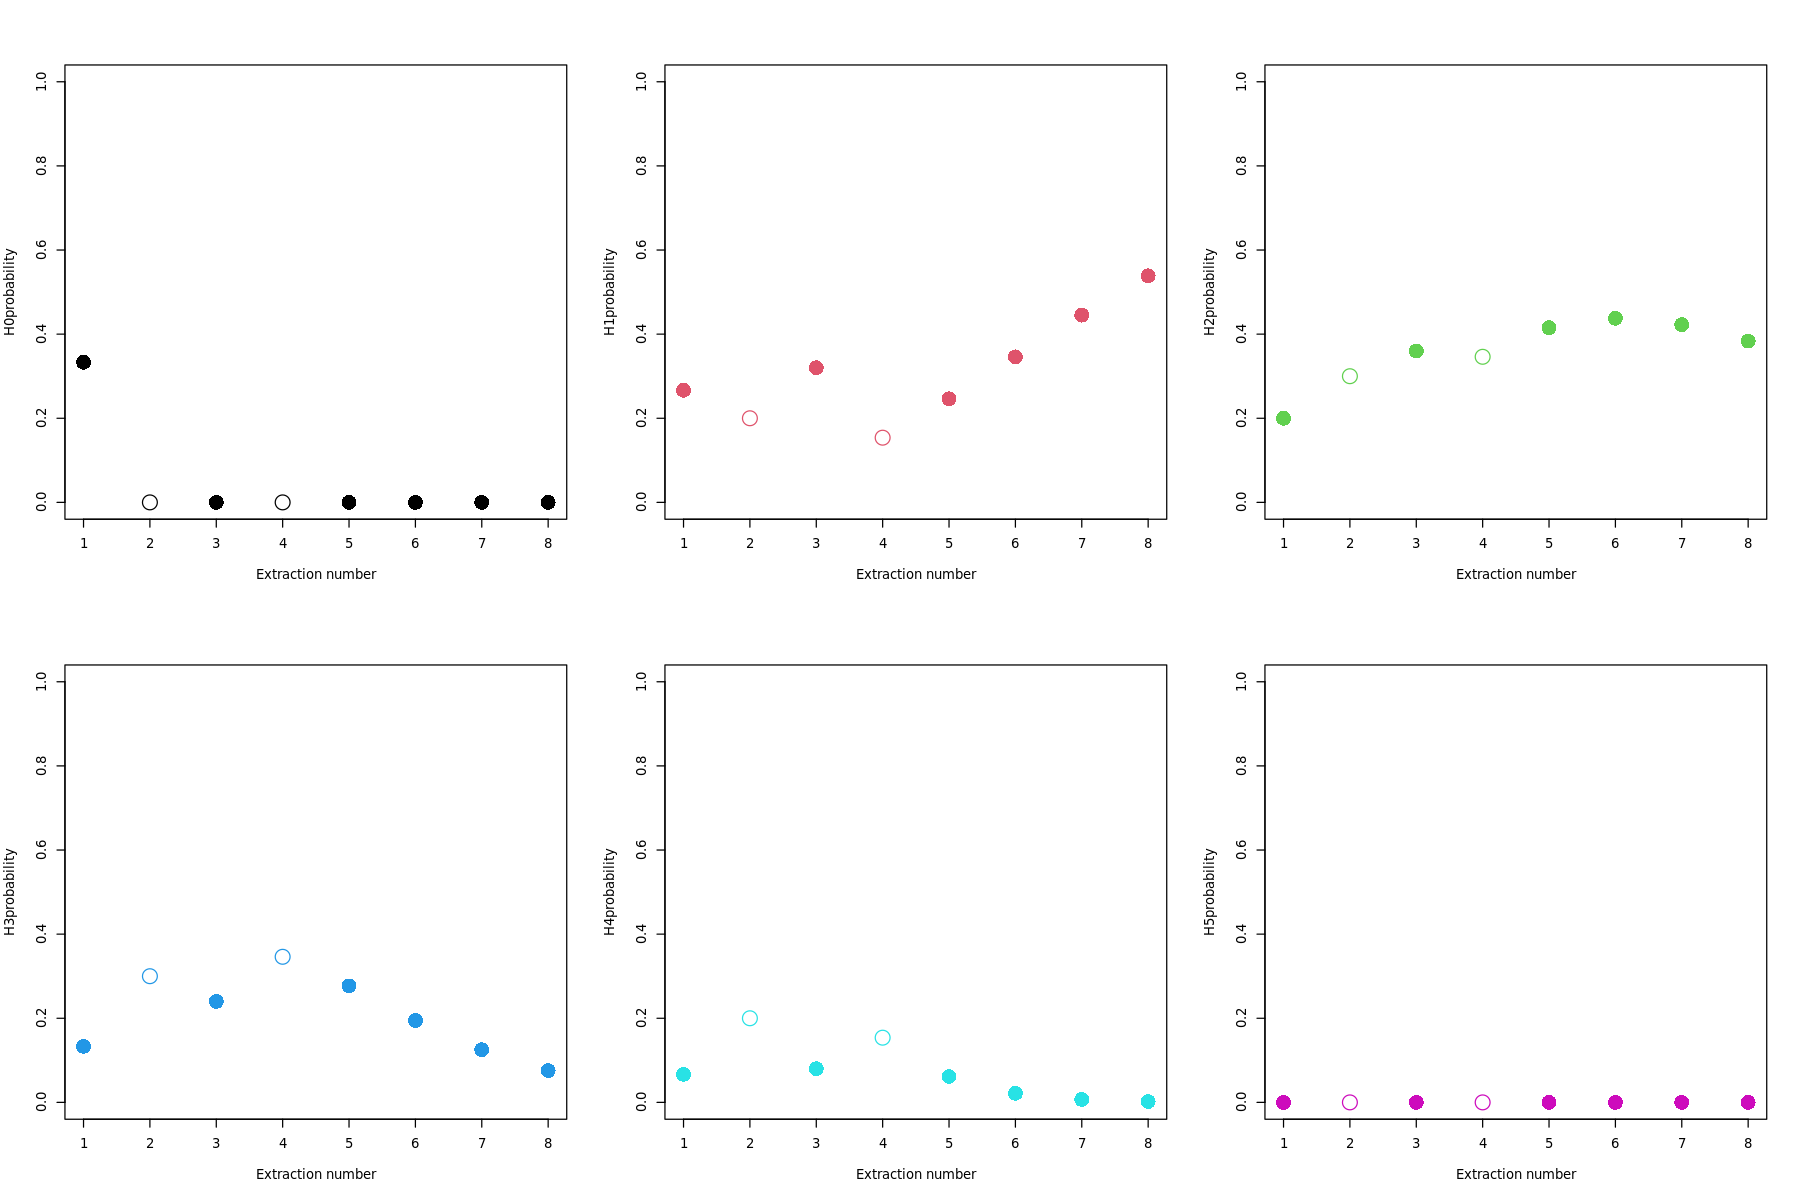

In [24]:
par(mfrow = c(2, 3))
options(repr.plot.width=15, repr.plot.height=10)

xs = seq(1,length(prob_Hi_history[,1]))
for (i in 1:6){
    plot(xs, prob_Hi_history[,i], xlab = "Extraction number", ylab = paste0("H", i-1, "probability"), ylim = c(0,1), col = i, pch = ifelse(extractions < 0.5, 16, 1), cex = 2.5)
}


### Exercise 5 - Six Boxes Toy Model : simulation
    Consider again the six boxes toy model of the previous exercise and write a simulation program that:
    1) selects a random box
    2) makes random sampling from the box
    3) prints on the standard output the probability of selecting each box
    4) plots the probability for each box as a function of the number of trial

In [27]:
H <- sample(c(0:5),1)
prob_w_given_H <- H/5

num_samples <- 20
extractions <- sample(c(0,1), size=num_samples, replace=TRUE, prob=c(1 - prob_w_given_H, prob_w_given_H))

prob_Hi_history <- matrix(NA, nrow=0, ncol=6)
prob_Hi_lastval <- rep(1/6, 6)
prob_w_given_Hi <- c(0, 1/5, 2/5, 3/5, 4/5, 5/5)
cat("Extractions (White/Black):\t", ifelse(extractions < 0.5, "B", "W"))

Extractions (White/Black):	 W W B W B B W W W W W W B B W W W W W W

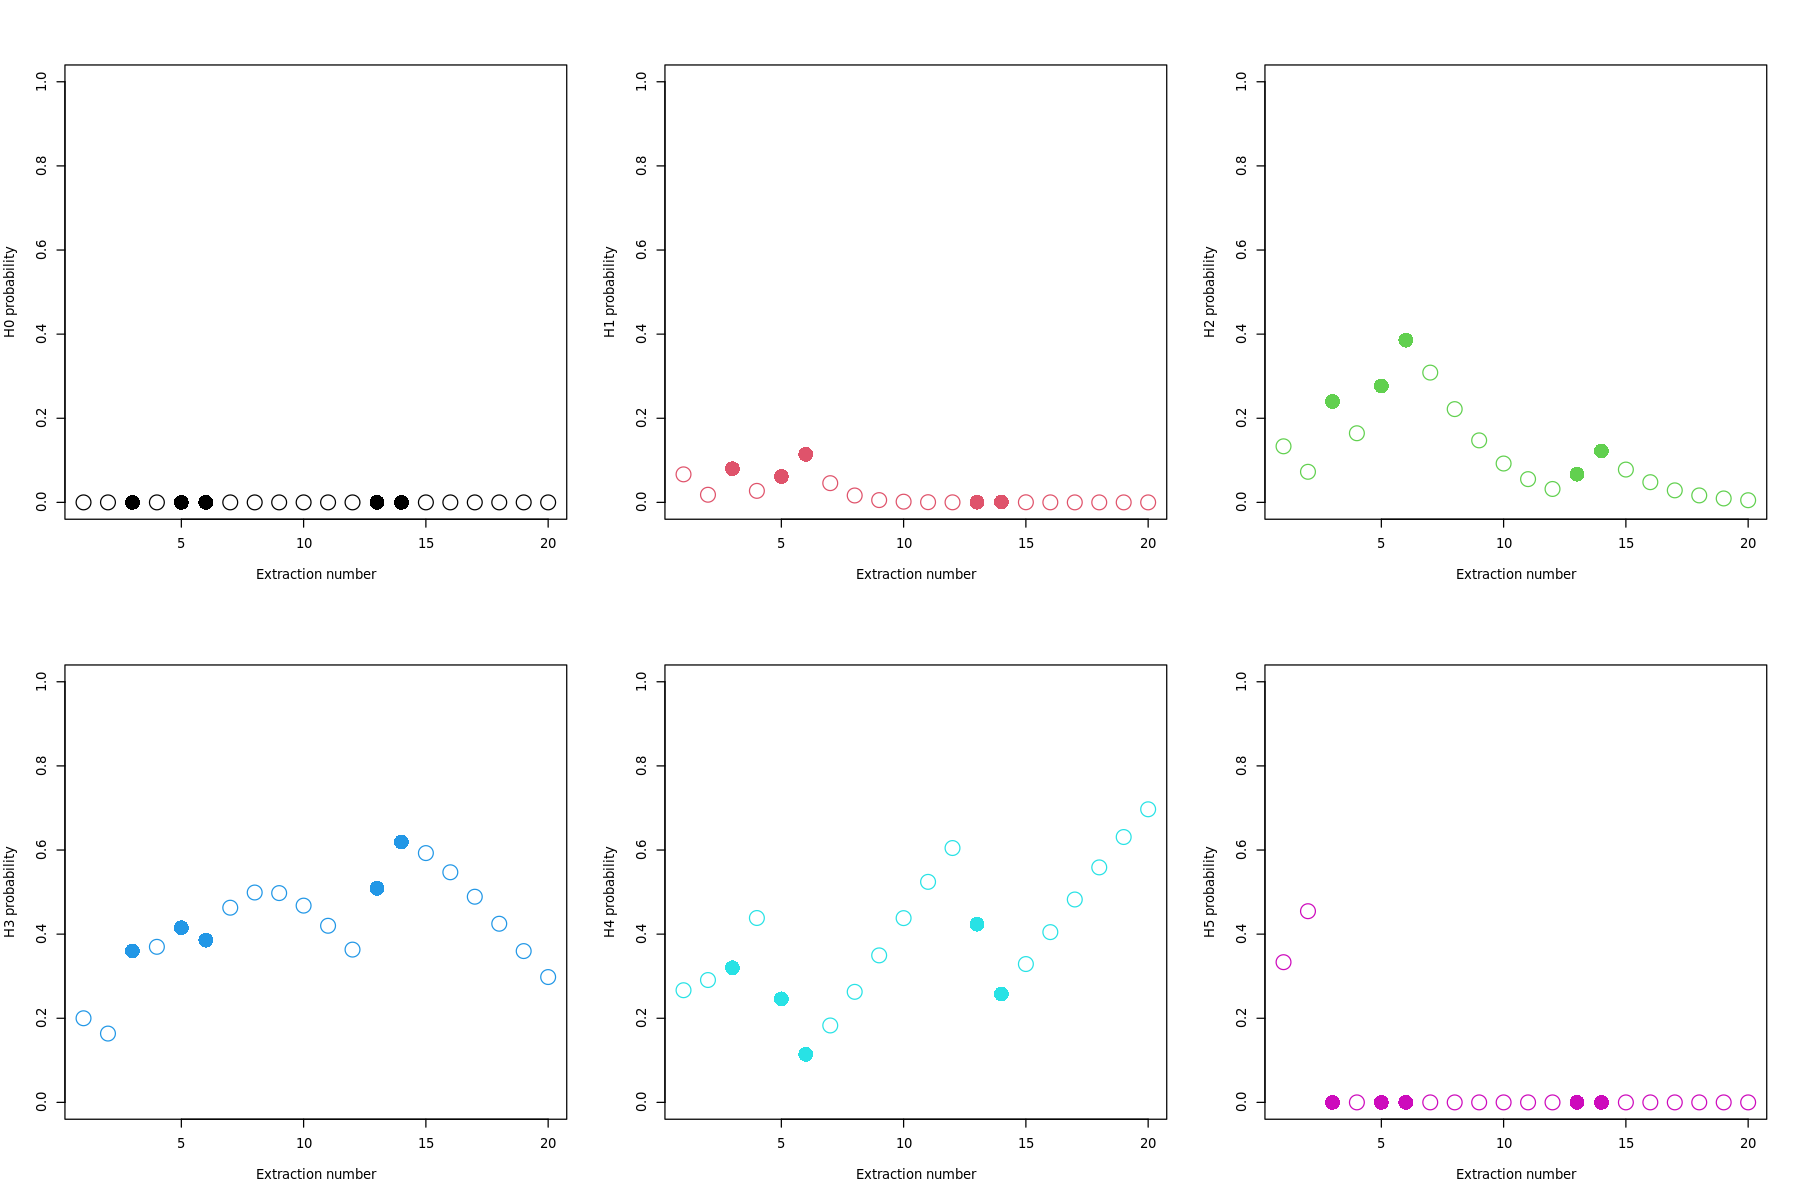

In [28]:
prob_Hi_history <- matrix(NA, nrow=0, ncol=6)
prob_Hi_lastval <- rep(1/6, 6)
prob_w_given_Hi <- c(0, 1/5, 2/5, 3/5, 4/5, 5/5)

for (n1 in extractions){
    norm <- 0
    for (i in 1:6){
    norm <- norm + (prob_w_given_Hi[i] * n1 + (1-n1)*(1-prob_w_given_Hi[i])) * prob_Hi_lastval[i]
    } 
    for (i in 1:6){
    prob_Hi_lastval[i] <- (prob_w_given_Hi[i] * n1 + (1-n1)*(1-prob_w_given_Hi[i])) * prob_Hi_lastval[i] / norm 
    }
    prob_Hi_history <- rbind(prob_Hi_history, prob_Hi_lastval)
}

par(mfrow = c(2, 3))
options(repr.plot.width=15, repr.plot.height=10)
xs = seq(1,length(prob_Hi_history[,1]))
for (i in 1:6){
    plot(xs, prob_Hi_history[,i], xlab = "Extraction number", ylab = paste0("H", i-1, " probability"), ylim = c(0,1), col = i, pch = ifelse(extractions < 0.5, 16, 1), cex = 2.5)
}

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=df7a8b0e-0120-46e5-a24c-db20fb7b523c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>